In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
Olympic_Athlete_Bio_df = pd.read_csv("files/Olympic_Athlete_Bio.csv")
Olympic_Athlete_Event_Results_df = pd.read_csv("files/Olympic_Athlete_Event_Results.csv")
Olympic_Games_Medal_Tally_df = pd.read_csv("files/Olympic_Games_Medal_Tally.csv")
Olympic_Results_df = pd.read_csv("files/Olympic_Results.csv")
Olympics_Country_df = pd.read_csv("files/Olympics_Country.csv")
Olympics_Games_df = pd.read_csv("files/Olympics_Games.csv")



In [3]:
Olympic_Athlete_Bio_df.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN
1,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...
2,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...
3,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN
4,50557,Rudolf Piowatý,Male,28 April 1900,NaN,NaN,Czechoslovakia,TCH,Rudolf Piowaty joined the Czechoslovak militar...,NaN


In [4]:
Merged_df = pd.merge(Olympic_Athlete_Bio_df, Olympic_Athlete_Event_Results_df, on="athlete_id")
Merged_df.head()

,athlete_id,name,sex,born,height,weight,country,country_noc_x,description,special_notes,edition,edition_id,country_noc_y,sport,event,result_id,athlete,pos,medal,isTeamSport
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,1976 Summer Olympics,19,BUL,Athletics,"4 × 400 metres Relay, Women",62051,Ivanka Bonova,5 h2 r1/2,NaN,True
1,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,1980 Summer Olympics,20,BUL,Athletics,"4 × 400 metres Relay, Women",62530,Ivanka Bonova,AC r2/2,NaN,True
2,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...,2008 Summer Olympics,53,RUS,Beach Volleyball,"Beach Volleyball, Women",258676,Nataliya Uryadova,=19,NaN,True
3,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...,2008 Summer Olympics,53,QAT,Athletics,"10,000 metres, Men",257228,Essa Ismail Rashed,20,NaN,False
4,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN,1932 Summer Olympics,10,HUN,Artistic Gymnastics,"Individual All-Around, Men",70092,Péter Boros,19,NaN,False


In [6]:
Merged_df1 = Merged_df[["athlete_id", "weight", "event", "medal"]]
Merged_df1

,athlete_id,weight,event,medal
0,65649,55,"4 × 400 metres Relay, Women",NaN
1,65649,55,"4 × 400 metres Relay, Women",NaN
2,112510,70,"Beach Volleyball, Women",NaN
3,114973,55,"10,000 metres, Men",NaN
4,30359,NaN,"Individual All-Around, Men",NaN
...,...,...,...,...
316822,74003,79,"4 × 400 metres Relay, Men",NaN
316823,74003,79,"400 metres, Men",NaN
316824,74003,79,"4 × 400 metres Relay, Men",NaN
316825,74003,79,"400 metres, Men",NaN


In [7]:
Merged_df2 = Merged_df1[Merged_df1["event"] == "400 metres, Men"]
Merged_df2

,athlete_id,weight,event,medal
270,75623,70,"400 metres, Men",NaN
346,65572,74,"400 metres, Men",NaN
348,65572,74,"400 metres, Men",NaN
446,65610,73,"400 metres, Men",NaN
508,132635,94,"400 metres, Men",NaN
...,...,...,...,...
316019,73242,NaN,"400 metres, Men",NaN
316250,70319,83,"400 metres, Men",NaN
316821,74003,79,"400 metres, Men",NaN
316823,74003,79,"400 metres, Men",NaN


In [8]:
weight_cleaned_df = Merged_df2.dropna(subset=['weight'])
weight_cleaned_df.set_index("athlete_id")


,weight,event,medal
athlete_id,,,
75623,70,"400 metres, Men",NaN
65572,74,"400 metres, Men",NaN
65572,74,"400 metres, Men",NaN
65610,73,"400 metres, Men",NaN
132635,94,"400 metres, Men",NaN
...,...,...,...
65225,75,"400 metres, Men",NaN
70319,83,"400 metres, Men",NaN
74003,79,"400 metres, Men",NaN


In [30]:
Gold_weight_df = weight_cleaned_df[weight_cleaned_df["medal"] == "Gold"]
Silver_weight_df = weight_cleaned_df[weight_cleaned_df["medal"] == "Silver"]
Bronze_weight_df = weight_cleaned_df[weight_cleaned_df["medal"] == "Bronze"]

No_Medal_weight_df = weight_cleaned_df[weight_cleaned_df["medal"] != "Gold"]
No_Medal_weight_df1 = weight_cleaned_df[weight_cleaned_df["medal"] != "Silver"]
No_Medal_weight_df2 = weight_cleaned_df[weight_cleaned_df["medal"] != "Bronze"]

In [31]:
Gold_weight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 510 to 304554
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   athlete_id  28 non-null     int64 
 1   weight      28 non-null     object
 2   event       28 non-null     object
 3   medal       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [45]:
Gold_weight_df.loc[:, 'weight'] = Gold_weight_df['weight'].astype(int)
Silver_weight_df.loc[:, 'weight'] = Silver_weight_df['weight'].astype(int)
Bronze_weight_df.loc[:, 'weight'] = Bronze_weight_df['weight'].astype(int)
No_Medal_weight_df2.loc[:, 'weight'] = No_Medal_weight_df2['weight'].astype(int)


In [44]:
No_Medal_weight_df2['weight'] = No_Medal_weight_df2['weight'].astype(str)
No_Medal_weight_df2 = No_Medal_weight_df2[No_Medal_weight_df2['weight'].str.isnumeric()]
No_Medal_weight_df2['weight'] = No_Medal_weight_df2['weight'].astype(int)

C:\Users\jandr\AppData\Local\Temp\ipykernel_16128\1630368176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_Medal_weight_df2['weight'] = No_Medal_weight_df2['weight'].astype(str)


In [39]:
Bronze_weight_df.loc[:, 'weight'] = Bronze_weight_df['weight'].astype(int)

In [ ]:
Bronze_weight_df['weight'] = Bronze_weight_df['weight'].astype(str)
Bronze_weight_df = Bronze_weight_df[Bronze_weight_df['weight'].str.isnumeric()]
Bronze_weight_df['weight'] = Bronze_weight_df['weight'].astype(int)

In [46]:
Gold_weight_df.head(2)

,athlete_id,weight,event,medal
510,132635,94,"400 metres, Men",Gold
11786,115006,86,"400 metres, Men",Gold


In [47]:
Silver_weight_df.head(2)

,athlete_id,weight,event,medal
10028,105653,83,"400 metres, Men",Silver
39793,70178,68,"400 metres, Men",Silver


In [48]:
Bronze_weight_df.head(2)

,athlete_id,weight,event,medal
11790,115006,86,"400 metres, Men",Bronze
36484,125965,83,"400 metres, Men",Bronze


In [49]:
No_Medal_weight_df2.head(2)

,athlete_id,weight,event,medal
270,75623,70,"400 metres, Men",NaN
346,65572,74,"400 metres, Men",NaN


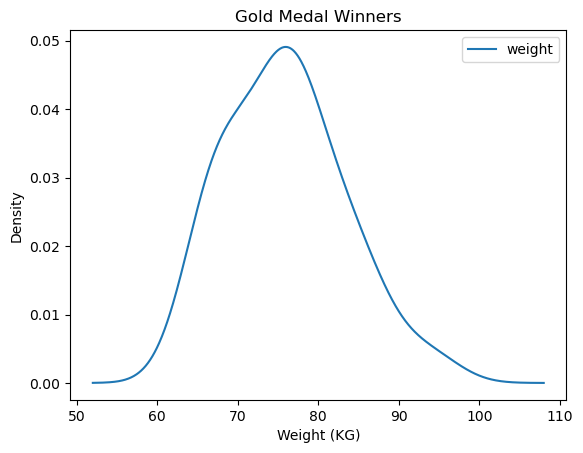

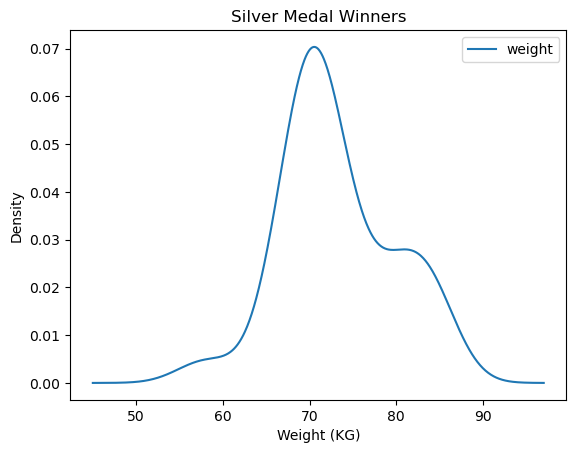

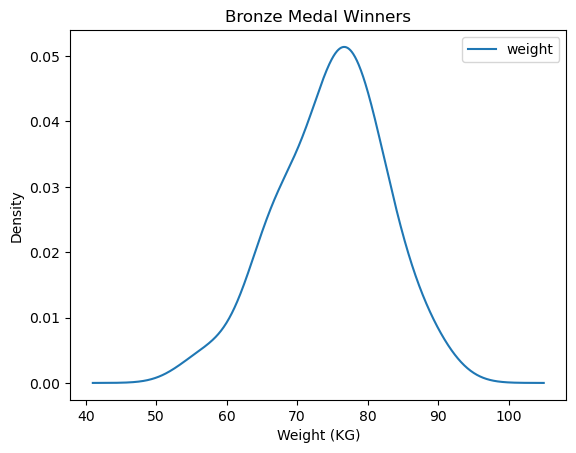

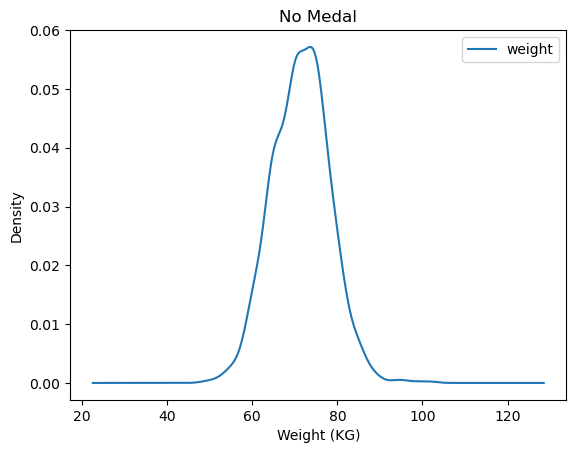

In [52]:
Gold_weight_df.plot(kind='kde', x='athlete_id', y='weight')
plt.xlabel('Weight (KG)')
plt.title('Gold Medal Winners')
plt.show()

Silver_weight_df.plot(kind='kde', x='athlete_id', y='weight')
plt.xlabel('Weight (KG)')
plt.title('Silver Medal Winners')
plt.show()

Bronze_weight_df.plot(kind='kde', x='athlete_id', y='weight')
plt.xlabel('Weight (KG)')
plt.title('Bronze Medal Winners')
plt.show()

No_Medal_weight_df2.plot(kind='kde', x='athlete_id', y='weight')
plt.xlabel('Weight (KG)')
plt.title('No Medal')
plt.show()

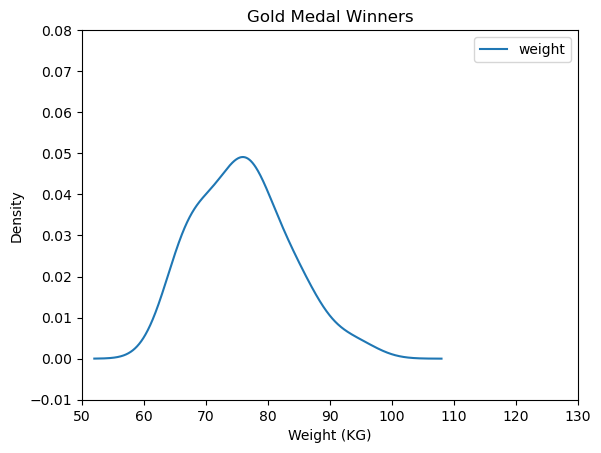

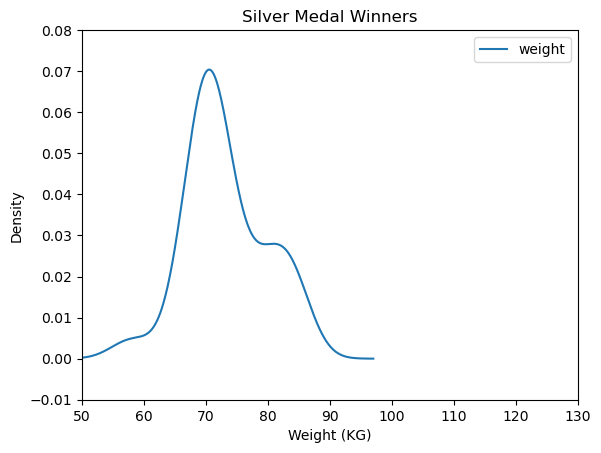

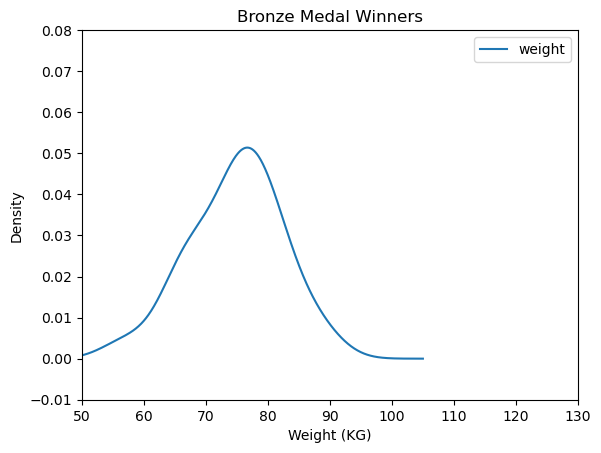

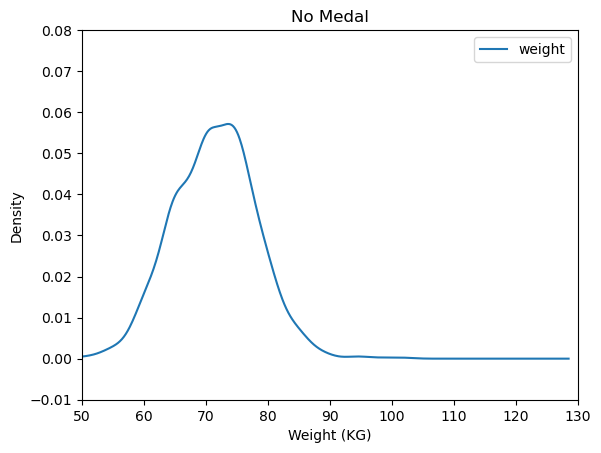

In [53]:
Gold_weight_df.plot(kind='kde', x='athlete_id', y='weight')
plt.xlabel('Weight (KG)')
plt.title('Gold Medal Winners')
plt.xlim(50, 130)
plt.ylim(-0.01, 0.08)
plt.show()

Silver_weight_df.plot(kind='kde', x='athlete_id', y='weight')
plt.xlabel('Weight (KG)')
plt.title('Silver Medal Winners')
plt.xlim(50, 130)
plt.ylim(-0.01, 0.08)
plt.show()

Bronze_weight_df.plot(kind='kde', x='athlete_id', y='weight')
plt.xlabel('Weight (KG)')
plt.title('Bronze Medal Winners')
plt.xlim(50, 130)
plt.ylim(-0.01, 0.08)
plt.show()

No_Medal_weight_df2.plot(kind='kde', x='athlete_id', y='weight')
plt.xlabel('Weight (KG)')
plt.title('No Medal')
plt.xlim(50, 130)
plt.ylim(-0.01, 0.08)
plt.show()